# Нанесем наиболее активные районы по ПЗЗ на карту Москвы

Используем DBSCAN и встроенные инструменты folium. Для этого понадобятся файл geo.xlsx

In [1]:
import pandas as pd
import sklearn as skl
import folium as fl
from folium.plugins import HeatMap
import numpy as np
from sklearn.metrics import *

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 10)

In [3]:
votes = pd.read_excel('geo.xlsx')

In [4]:
X_db = votes[['x','y']]

In [5]:
X = votes.groupby(['x','y']).count().reset_index()

In [6]:
weight = X['comment_class']

In [7]:
del X['comment_class']

In [8]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 2 columns):
x    2542 non-null float64
y    2542 non-null float64
dtypes: float64(2)
memory usage: 39.8 KB


In [9]:
from sklearn.cluster import DBSCAN

In [10]:
# параметры получены подбором, визуально просматривая вектор pd.Series(dbsc).value_counts()
# и немного размышляя)

model_db = DBSCAN()

In [11]:
model_db = DBSCAN( eps= 0.01, min_samples=1000)

In [12]:
dbsc = model_db.fit(X_db)
labels = dbsc.labels_

#print("Silhouette Coefficient:",  silhouette_score(X_db, labels))

In [13]:
pd.Series(labels).value_counts()

-1     25151
 2     14609
 0     13335
 3     11057
 4      7341
 6      6312
 12     5976
 1      5186
 14     3739
 5      3007
 7      2552
 13     2163
 11     1984
 10     1844
 9      1617
 8      1593
 15     1340
dtype: int64

In [14]:
label = pd.DataFrame(data = labels, columns= ['cluster'])
X_label = pd.concat([X_db, label], axis=1)


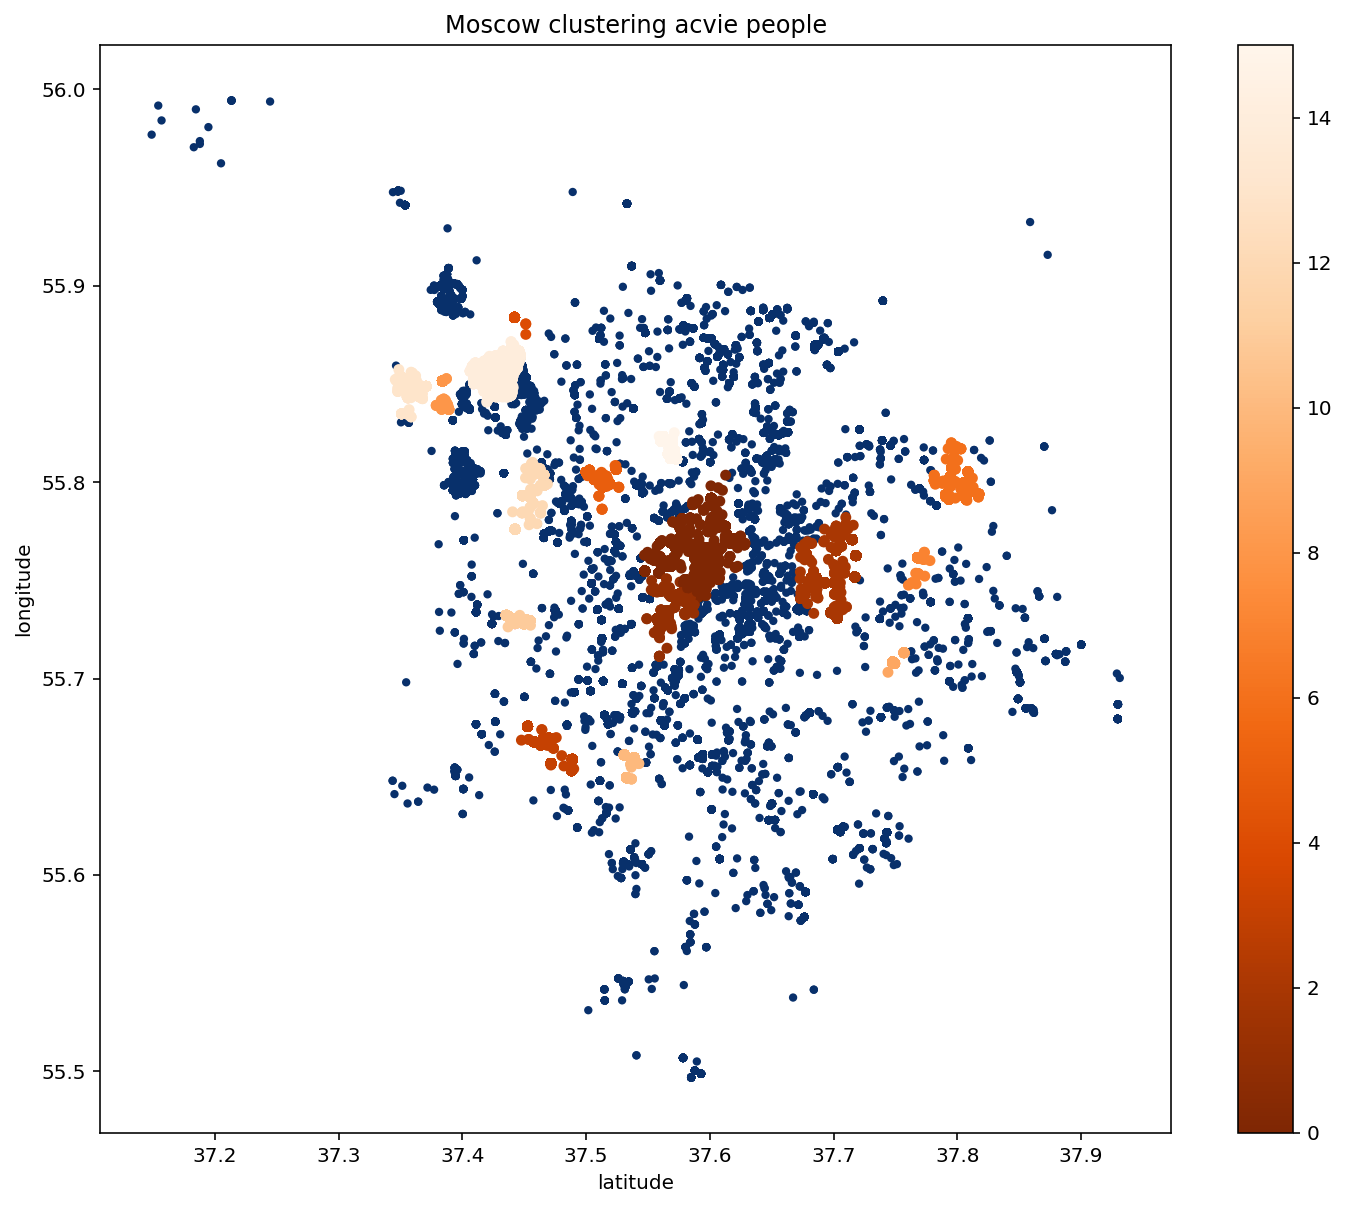

In [15]:
# синим жители, которые не попали в кластеры
plt.scatter(X_label['x'][X_label.cluster == -1], X_label['y'][X_label.cluster == -1], \
            c = X_label['cluster'][X_label.cluster == -1], cmap='Blues_r' ,s = 10)

# изображаем кластеры активных жителей
plt.scatter(X_label['x'][X_label.cluster>-1], X_label['y'][X_label.cluster>-1], \
            c = X_label['cluster'][X_label.cluster>-1], cmap='Oranges_r', s = 20)
#plt.contour(X)
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Moscow clustering acvie people')

Наиболее активные жители показаны цветом. Воспроизведем это на карте folium

In [16]:
map_mos = fl.Map(location=[55.75, 37.615], zoom_start=9)

In [17]:
X_fl =  votes[['y','x']]

In [18]:
X_fl = X_fl.values.tolist()

In [19]:
HeatMap(X_fl, radius = 9).add_to(map_mos)

In [20]:
map_mos

In [21]:
#сохраняем
map_mos.save("pzz_moscow_active_heat_map.html")